In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'MNIST'
exp_root = '/media/n31v/data/results/' + ds_name

In [ ]:
create_mean_exps(exp_root)

In [3]:
baseline, sfp_exps, svd_exps = exp_list(ds_name)
svd_channel = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=baseline['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.992


In [ ]:
svd_channel['Hoer 0.1 Ort 10']

In [ ]:
sfp_per

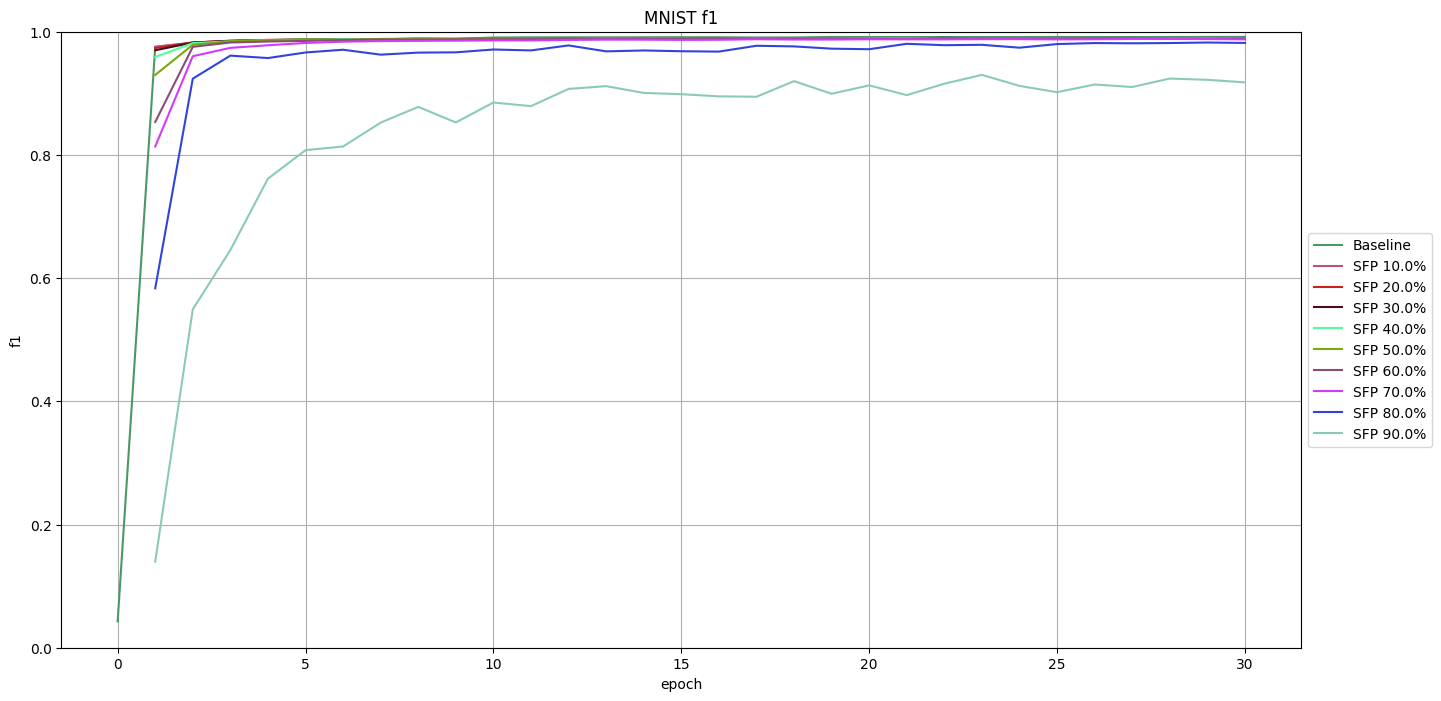

In [4]:
exps = {**baseline}
exps.update(sfp_exps['percentage'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=False,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    # saving_path='f1.png'
)

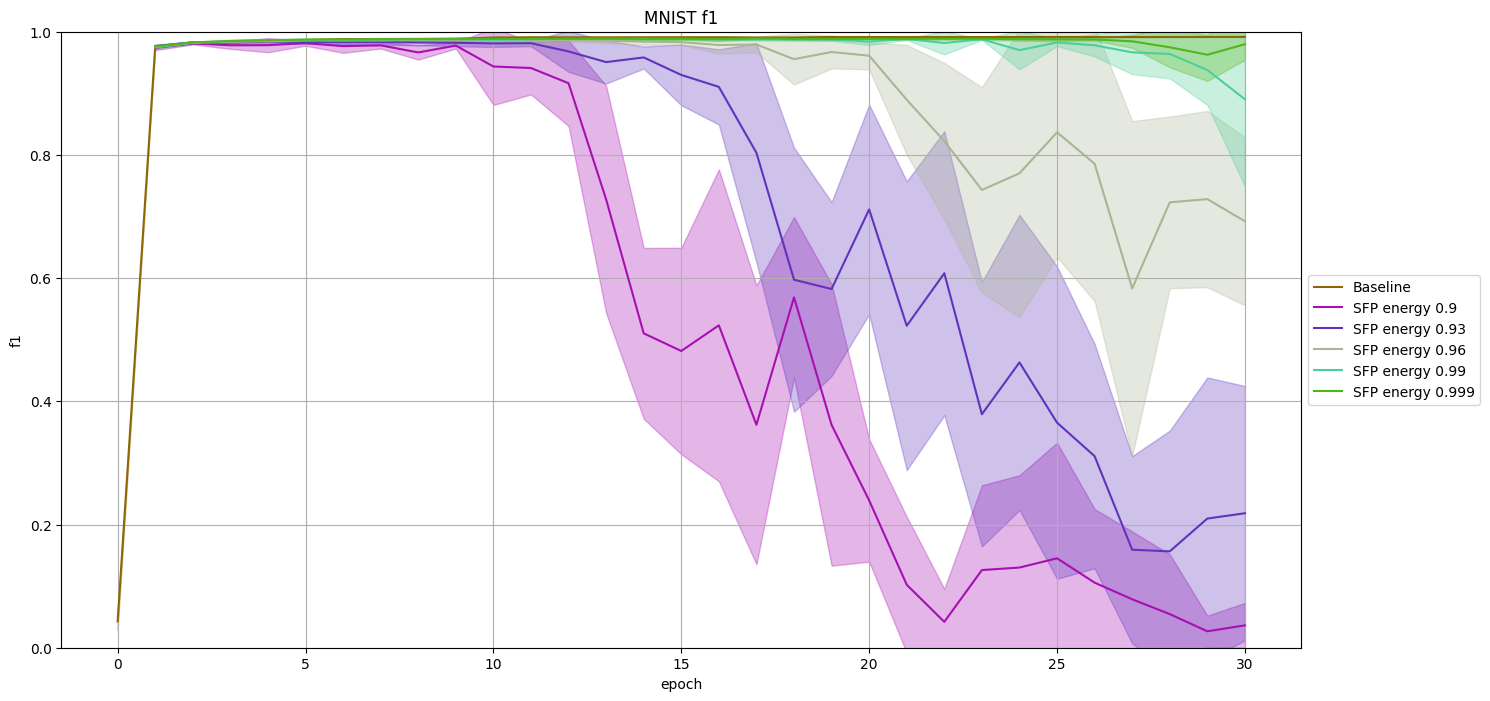

In [5]:
exps = {**baseline}
exps.update(sfp_exps['energy'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    # saving_path='f1.png'
)

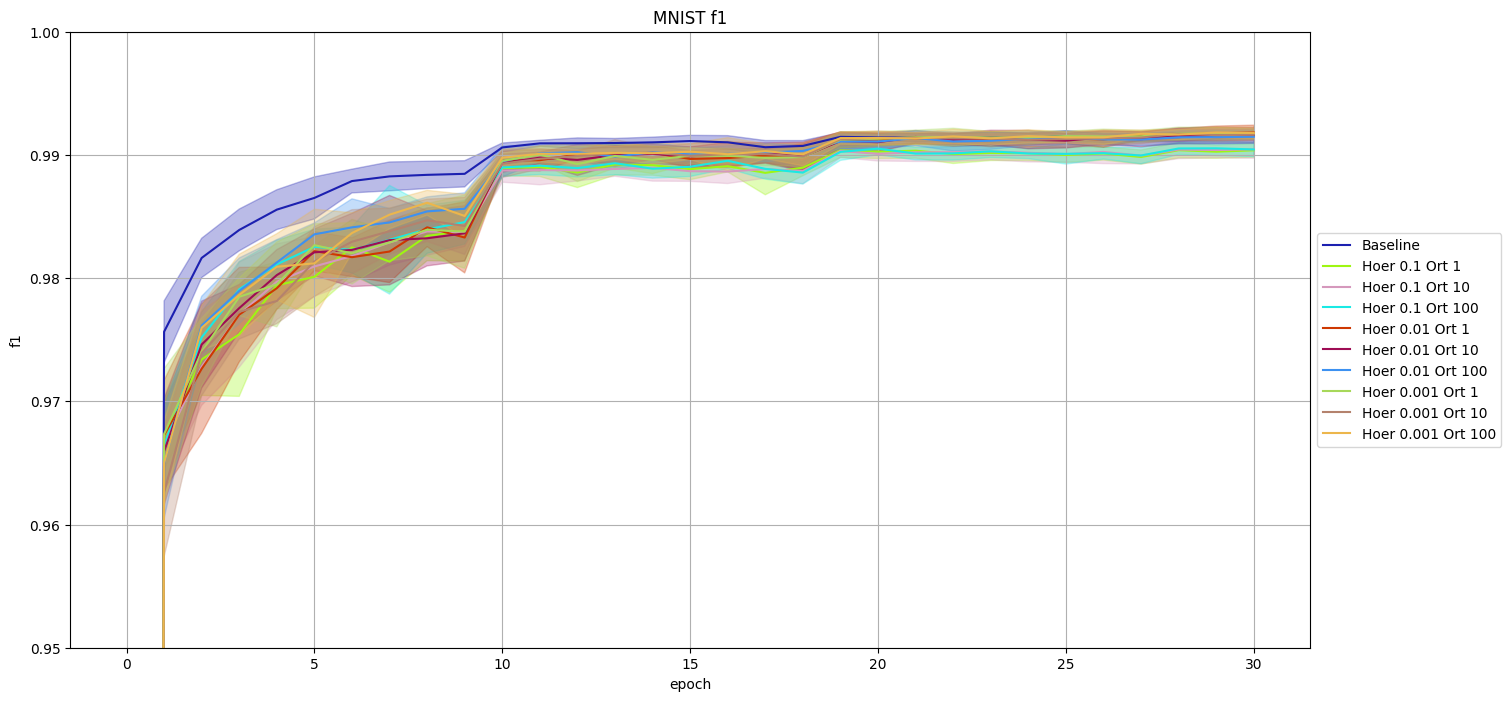

In [6]:
exps = {**baseline}
exps.update(svd_exps['channel'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0.95, 1),
    # saving_path='f1.png'
)

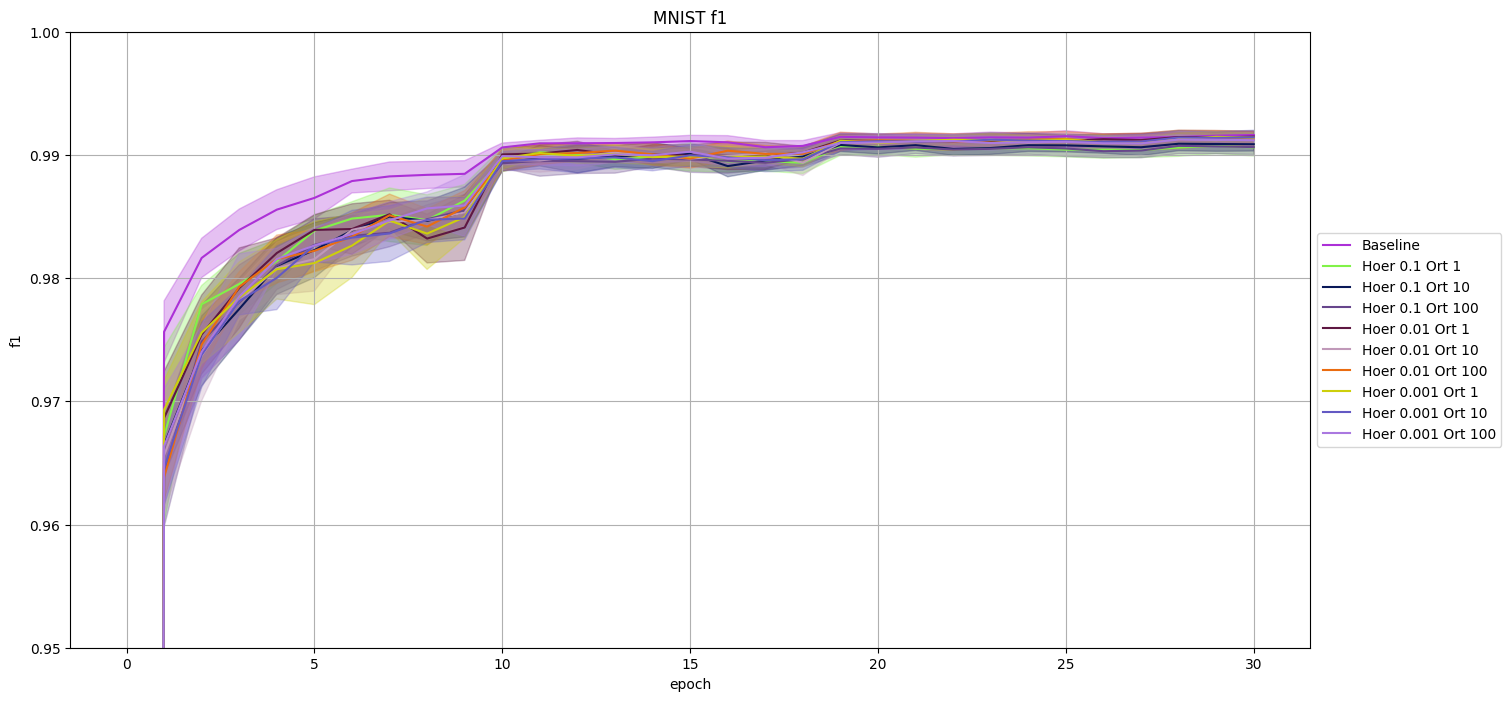

In [7]:
exps = {**baseline}
exps.update(svd_exps['spatial'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0.95, 1),
    # saving_path='f1.png'
)

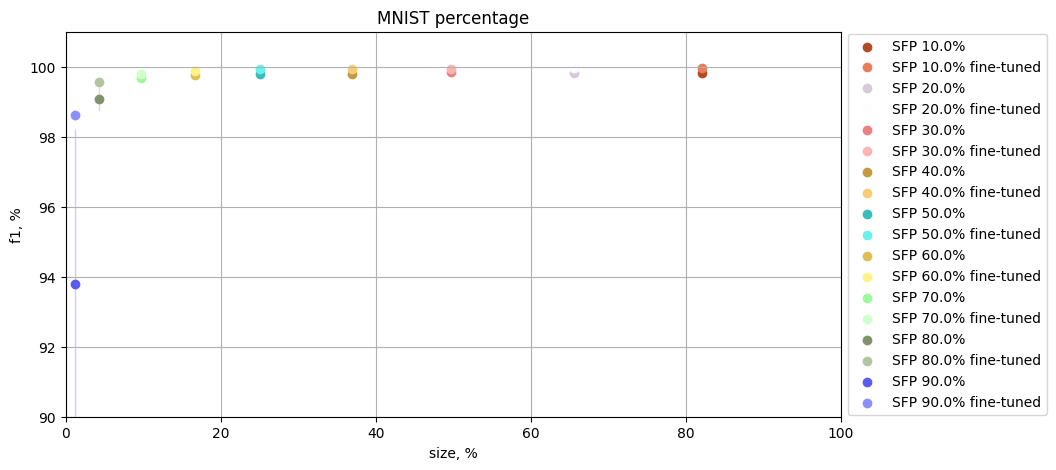

In [8]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 101),
    xlim=(0, 100)
)

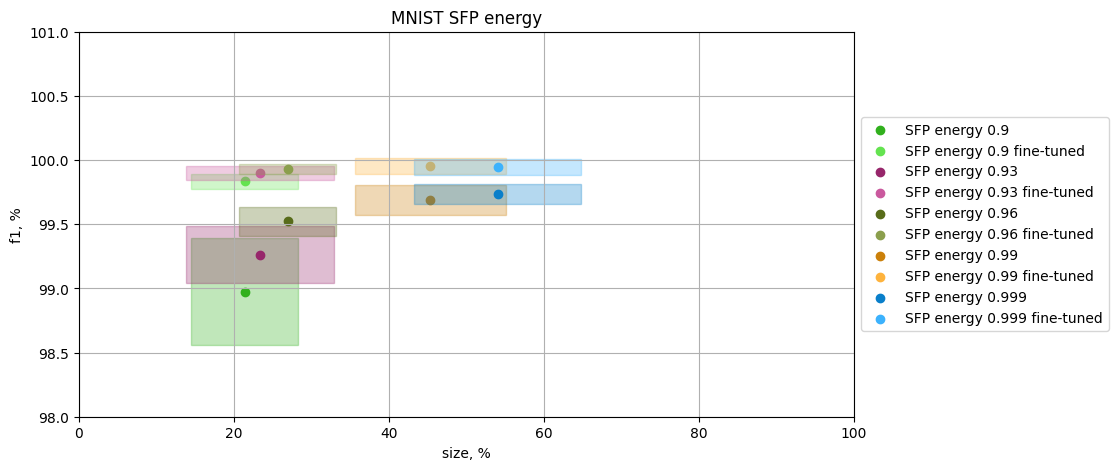

In [9]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(10, 5),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(98, 101),
    xlim=(0, 100)
)

In [10]:
channel_exps = {k: v for k, v in svd_channel.items() if 'Hoer 0.1' in k}

In [ ]:
channel_exps = {k: v for k, v in svd_channel.items() if k.endswith('Ort 10')}

In [ ]:
channel_exps = {k: v[['size', 'fine-tuned']] for k, v in svd_channel.items()}

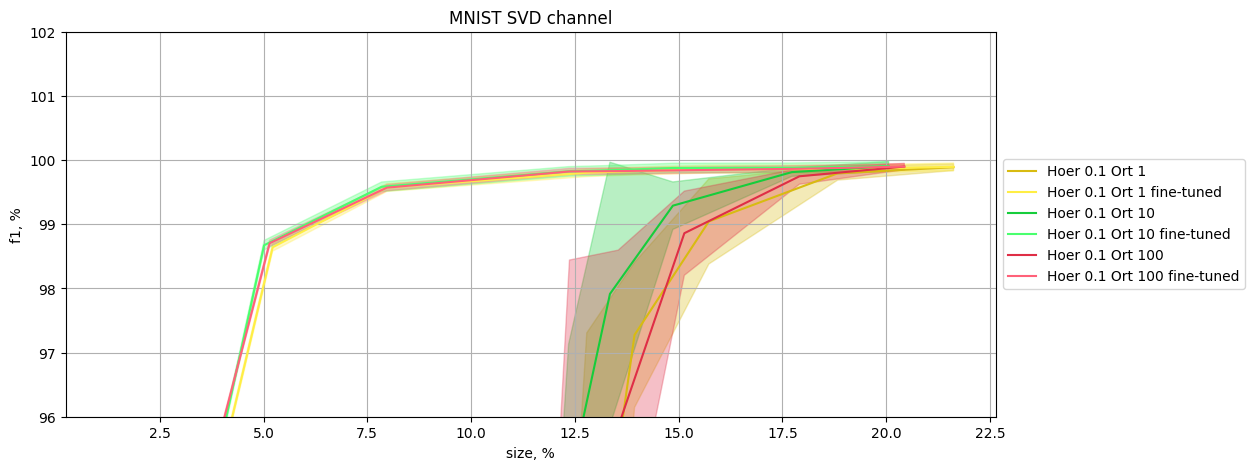

In [11]:
ax = show_svd_results(
    svd_exps=channel_exps,
    figsize=(12, 5),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(96, 102),
    # xlim=(0, 100)
)

In [12]:
spatial_exps = {k: v for k, v in svd_spatial.items() if 'Hoer 0.1' in k}

In [ ]:
spatial_exps = {k: v for k, v in svd_spatial.items() if k.endswith('Ort 10')}

In [ ]:
spatial_exps = {k: v[['pruned', 'fine-tuned']] for k, v in svd_spatial.items() if 'Hoer 0.1' in k }

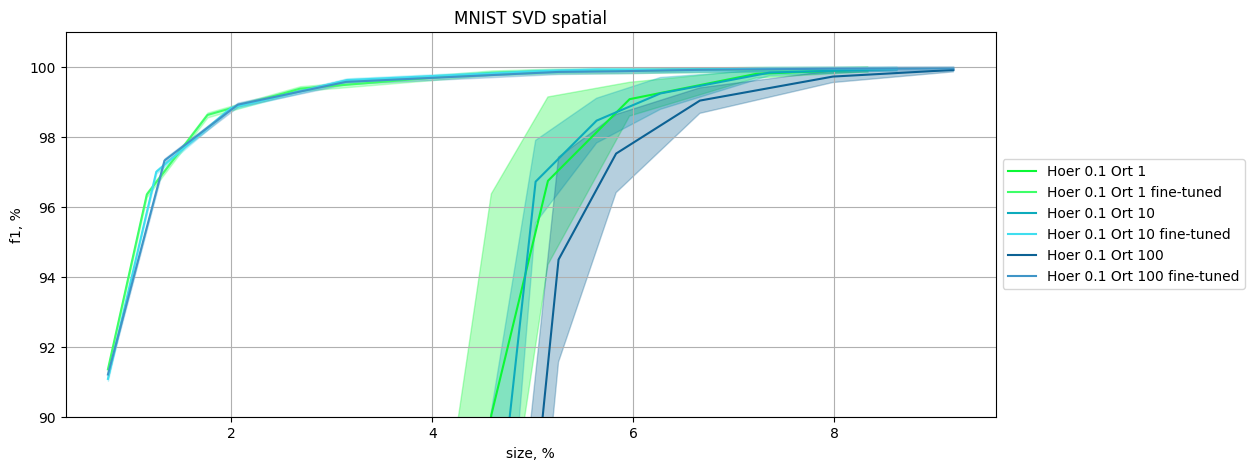

In [14]:
ax = show_svd_results(
    svd_exps=spatial_exps,
    figsize=(12, 5),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 101),
    # xlim=(0, 100)
)

In [4]:
best_svd = dict(channel = 'Hoer 0.1 Ort 10', spatial = 'Hoer 0.1 Ort 10')

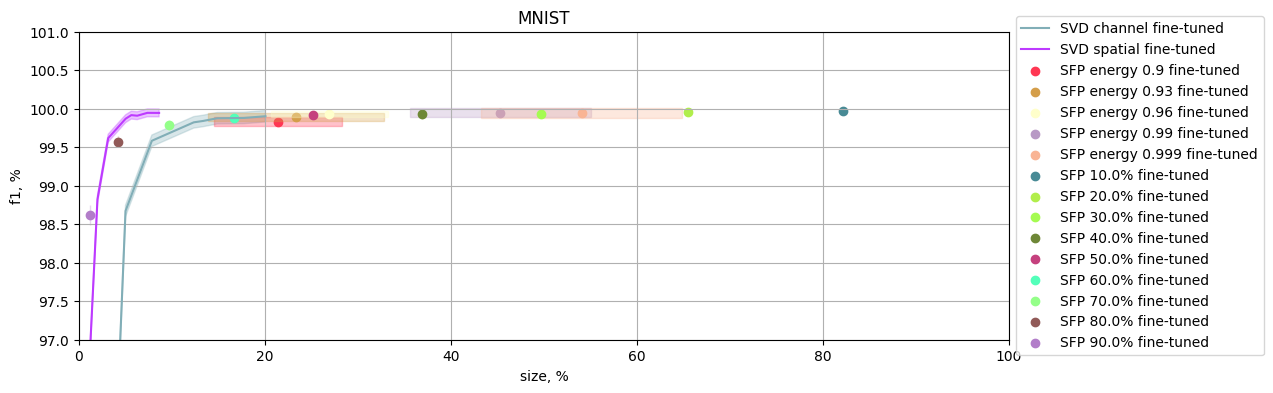

In [16]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per])[['size', 'size std', 'fine-tuned', 'fine-tuned std']],
    svd_exps={
        'SVD channel': svd_channel[best_svd['channel']][['size', 'fine-tuned', 'fine-tuned std']],
        'SVD spatial': svd_spatial[best_svd['spatial']][['size', 'fine-tuned', 'fine-tuned std']],
    },
    figsize=(12, 4),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(97, 101),
    xlim=(0, 100)
)

In [5]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {
            "SFP percent": f"{sfp_per.loc[sfp_per[phase]>=percent]['size'].min():.0f}",
            "SFP energy": f"{sfp_energy.loc[sfp_energy[phase]>=percent]['size'].min():.0f}",
            "SVD channel": f"{svd_channel[best_svd['channel']].loc[svd_channel[best_svd['channel']][phase]>=percent]['size'].min():.0f}",
            "SVD spatial": f"{svd_spatial[best_svd['spatial']].loc[svd_spatial[best_svd['spatial']][phase]>=percent]['size'].min():.0f}"
        }
results_tabel = pd.DataFrame(results).T
results_tabel

,SFP percent,SFP energy,SVD channel,SVD spatial
100% pruned,nan,nan,nan,nan
100% fine-tuned,nan,nan,nan,nan
99% pruned,4,23,15,6
99% fine-tuned,4,21,8,3
97% pruned,4,21,13,6
97% fine-tuned,1,21,5,2


## FLOP

In [20]:
best_exps = dict(
    channel=svd_channel[best_svd['channel']].loc[svd_channel[best_svd['channel']]['fine-tuned']>=99]['size'].idxmin(),
    spatial=svd_spatial[best_svd['spatial']].loc[svd_spatial[best_svd['spatial']]['fine-tuned']>=99]['size'].idxmin(),
    percentage=sfp_per.loc[sfp_per['fine-tuned']>=99]['size'].idxmin(),
    energy=sfp_energy.loc[sfp_energy['fine-tuned']>=99]['size'].idxmin()
)
best_exps

{'channel': 'e_0.7',
 'spatial': 'e_0.7',
 'percentage': 'SFP 80.0%',
 'energy': 'SFP energy 0.9'}

In [23]:
from os import path
import torch
from fedot_ind.core.operation.optimization.svd_tools import load_svd_state_dict
from experiments.classificaion.simple_conv_net import SimpleConvNet3, load_simple_conv_net

models = {'baseline': SimpleConvNet3(in_channels=1)}
sd_path = path.join(path.split(baseline['Baseline'])[0],'0_0','train.sd.pt')
models['baseline'].load_state_dict(torch.load(sd_path))
stats = {'size': {'baseline': os.path.getsize(sd_path)}}

for dec_mode in ['channel', 'spatial']:
    sd_path = path.join(path.split(svd_exps[dec_mode][best_svd[dec_mode]])[0],'0_0', f'{best_exps[dec_mode]}.sd.pt')
    for forward_mode in ['one_layer', 'two_layers', 'three_layers']:
        model = SimpleConvNet3(in_channels=1)
        load_svd_state_dict(model=model, decomposing_mode=dec_mode, state_dict_path=sd_path, forward_mode=forward_mode)
        models[f'SVD {dec_mode} {forward_mode}'] = model
        stats['size'][f'SVD {dec_mode} {forward_mode}'] = os.path.getsize(sd_path)

for zeroing_mode in ['percentage', 'energy']:
    sd_path = path.join(path.split(sfp_exps[zeroing_mode][best_exps[zeroing_mode]])[0],'0_0', 'pruned.sd.pt')
    models[best_exps[zeroing_mode]] = load_simple_conv_net(sd_path)
    stats['size'][best_exps[zeroing_mode]] = os.path.getsize(sd_path)

In [ ]:
from optim.flops import flop

stats['flop'] = {}
for name, model in models.items():
    f = flop(model, ds_name, input_size=(32, 1, 28, 28))
    stats['flop'][name] = sum([v['flops'] for v in f.values()])

## val

In [34]:
from datetime import datetime
from torch.utils.data import Subset, DataLoader
from fedot_ind.core.architecture.experiment.nn_experimenter import ClassificationExperimenter
from experiments.classificaion.exp_parameters import get_mnist


dataset, ds_folds = get_mnist()
val_ds = Subset(dataset=dataset, indices=ds_folds[0, 1, :])
val_dl = DataLoader(val_ds, batch_size=32, num_workers=8)

stats['time'] = {}
stats['f1'] = {}

for name, model in models.items():
    exp = ClassificationExperimenter(model=model)
    print(name)
    start_t = datetime.now()
    for _ in range(10):
        metrics = exp.val_loop(val_dl)
    stats['time'][name] = datetime.now() - start_t
    stats['f1'][name] = metrics['f1']

baseline


val: 100%|██████████| 782/782 [00:01<00:00, 480.65it/s]


SVD channel one_layer


val: 100%|██████████| 782/782 [00:01<00:00, 415.42it/s]


SVD channel two_layers


val: 100%|██████████| 782/782 [00:01<00:00, 431.34it/s]


SVD channel three_layers


val: 100%|██████████| 782/782 [00:01<00:00, 411.56it/s]


SVD spatial one_layer


val: 100%|██████████| 782/782 [00:01<00:00, 475.60it/s]


SVD spatial two_layers


val: 100%|██████████| 782/782 [00:01<00:00, 426.83it/s]


SVD spatial three_layers


val: 100%|██████████| 782/782 [00:02<00:00, 343.26it/s]


SFP 80.0%


val: 100%|██████████| 782/782 [00:01<00:00, 439.41it/s]


SFP energy 0.9


val: 100%|██████████| 782/782 [00:01<00:00, 408.32it/s]


In [35]:
compare_df = pd.DataFrame(stats)
compare_df['flop, %'] = compare_df['flop'] / compare_df.loc['baseline', 'flop'] * 100
compare_df['size, %'] = compare_df['size'] / compare_df.loc['baseline', 'size'] * 100
compare_df['f1, %'] = compare_df['f1'] / compare_df.loc['baseline', 'f1'] * 100
compare_df['time, %'] = compare_df['time'] / compare_df.loc['baseline', 'time'] * 100
compare_df

,size,flop,time,f1,"flop, %","size, %","f1, %","time, %"
baseline,1822681,708165632,0 days 00:00:17.323994,0.991198,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,143371,715437312,0 days 00:00:19.737781,0.987714,101.026833,7.865940,99.648507,113.933202
SVD channel two_layers,143371,97541570,0 days 00:00:19.806916,0.987714,13.773836,7.865940,99.648507,114.332272
SVD channel three_layers,143371,98295808,0 days 00:00:20.039583,0.987714,13.880341,7.865940,99.648507,115.675306
SVD spatial one_layer,63243,715130368,0 days 00:00:19.486778,0.988440,100.983490,3.469779,99.721690,112.484327
SVD spatial two_layers,63243,51130458,0 days 00:00:19.573349,0.988480,7.220127,3.469779,99.725703,112.984044
SVD spatial three_layers,63243,51748864,0 days 00:00:20.986748,0.988440,7.307452,3.469779,99.721690,121.142665
SFP 80.0%,80099,38395008,0 days 00:00:17.845103,0.987560,5.421755,4.394570,99.632966,103.008019
SFP energy 0.9,236323,88019328,0 days 00:00:18.932953,0.989521,12.429201,12.965681,99.830741,109.287460


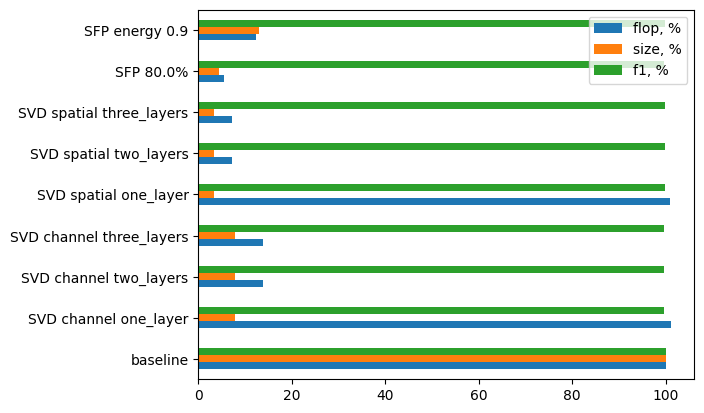

In [43]:
compare_df.iloc[:, 4:7].plot(kind='barh');